In [ ]:
import numpy as np
import sympy as sp
from sympy import symbols, expand, simplify, integrate, Matrix, Poly, pprint, lambdify
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import legendre, chebyt
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# CONFIGURACIÓN INICIAL
# =============================================================================
print("=" * 80)
print("ANÁLISIS DE POLINOMIOS ORTOGONALES: LEGENDRE Y CHEBYSHEV")
print("=" * 80)

# Símbolos
x, y = symbols('x y')
a1, a2 = -1, 1

ANÁLISIS DE POLINOMIOS ORTOGONALES: LEGENDRE Y CHEBYSHEV


In [ ]:
# =============================================================================
# PARTE (a): MOSTRAR QUE LA BASE DE MONOMIOS NO ES ORTOGONAL
# =============================================================================
print("\n" + "="*60)
print("PARTE (a): BASE DE MONOMIOS NO ES ORTOGONAL")
print("="*60)

# Base de monomios hasta x^4
monomios = [lambda x, i=i: x**i for i in range(5)]

# Matriz de productos internos
print("Matriz de productos internos ⟨x^i|x^j⟩:")
print("    " + "   ".join(f"x^{i}" for i in range(5)))

for i in range(5):
    row = []
    for j in range(5):
        # Calcular producto interno ∫xⁱxʲdx desde -1 hasta 1
        integral, _ = quad(lambda x: monomios[i](x) * monomios[j](x), a1, a2)
        row.append(f"{integral:.3f}")
    print(f"x^{i}  [" + "  ".join(row) + "]")

print("\nLa matriz NO es diagonal → la base NO es ortogonal")


PARTE (a): BASE DE MONOMIOS NO ES ORTOGONAL
Matriz de productos internos ⟨x^i|x^j⟩:
    x^0   x^1   x^2   x^3   x^4
x^0  [2.000  0.000  0.667  0.000  0.400]
x^1  [0.000  0.667  0.000  0.400  0.000]
x^2  [0.667  0.000  0.400  0.000  0.286]
x^3  [0.000  0.400  0.000  0.286  0.000]
x^4  [0.400  0.000  0.286  0.000  0.222]

La matriz NO es diagonal → la base NO es ortogonal


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import legendre, chebyt
import warnings
warnings.filterwarnings('ignore')

# =============================================================================
# CONFIGURACIÓN INICIAL
# =============================================================================
print("=" * 80)
print("ANÁLISIS DE POLINOMIOS ORTOGONALES: LEGENDRE Y CHEBYSHEV")
print("=" * 80)

# Límites de integración
a1, a2 = -1, 1

# =============================================================================
# FUNCIÓN AUXILIAR PARA GRAM-SCHMIDT ESTABLE
# =============================================================================
def gram_schmidt_estable(producto_func, n_vectores=10, tol=1e-10):
    """
    Implementación estable de Gram-Schmidt con tolerancia numérica
    """
    polinomios = []
    normas = []

    for i in range(n_vectores):
        # Función para el monomio actual
        def monomio_func(x):
            return x**i

        current_poly = monomio_func

        # Ortogonalizar respecto a todos los polinomios anteriores
        for j in range(len(polinomios)):
            # Calcular producto interno ⟨current_poly | poly_j⟩
            def integrando_proj(x):
                return current_poly(x) * polinomios[j](x)

            producto, _ = quad(integrando_proj, a1, a2)

            # Si el producto interno es significativo, restar la proyección
            if abs(producto) > tol:
                # Calcular ⟨poly_j | poly_j⟩
                def integrando_norm(x):
                    return polinomios[j](x)**2

                norma_poly, _ = quad(integrando_norm, a1, a2)

                if abs(norma_poly) > tol:
                    coef = producto / norma_poly
                    old_poly = current_poly
                    current_poly = lambda x, coef=coef, old=old_poly, pj=polinomios[j]: old(x) - coef * pj(x)

        # Calcular norma del polinomio ortogonalizado
        def integrando_norm_final(x):
            return current_poly(x)**2

        norma_final, _ = quad(integrando_norm_final, a1, a2)

        # Normalizar si la norma es significativa
        if norma_final > tol:
            polinomios.append(current_poly)
            normas.append(norma_final)
        else:
            # Polinomio linealmente dependiente, usar el monomio directamente
            polinomios.append(monomio_func)
            normas.append(1.0)  # Valor por defecto

    return polinomios, normas

# =============================================================================
# PARTE (b): POLINOMIOS DE LEGENDRE
# =============================================================================
print("\n" + "="*70)
print("PARTE (b): POLINOMIOS DE LEGENDRE - 10 PRIMEROS VECTORES ORTOGONALES")
print("="*70)
print("Producto interno: ⟨f|g⟩ = ∫f(x)g(x)dx desde -1 hasta 1")
print("="*70)

# Producto interno para Legendre
def producto_legendre(f, g):
    def integrando(x):
        return f(x) * g(x)
    resultado, _ = quad(integrando, a1, a2)
    return resultado

# Calcular polinomios de Legendre
legendre_polinomios, legendre_normas = gram_schmidt_estable(producto_legendre, 10)

print("10 PRIMEROS POLINOMIOS DE LEGENDRE (VALORES NUMÉRICOS)")
print("="*70)

# Mostrar valores en puntos específicos
x_eval = np.linspace(-1, 1, 5)
print("x    " + "".join([f"P_{i}(x)      " for i in range(5)]))

for x_val in x_eval:
    valores = [f"{x_val:4.1f}"]
    for i in range(5):
        try:
            valor = legendre_polinomios[i](x_val)
            valores.append(f"{valor:8.4f}")
        except:
            valores.append("   NaN   ")
    print("  ".join(valores))

# Verificar ortogonalidad
print("\nVERIFICACIÓN DE ORTOGONALIDAD (PRIMEROS 5 POLINOMIOS)")
print("-" * 50)

for i in range(4):
    for j in range(i+1, 5):
        producto = producto_legendre(legendre_polinomios[i], legendre_polinomios[j])
        print(f"⟨P_{i}|P_{j}⟩ = {producto:.8f}")

# =============================================================================
# PARTE (c): POLINOMIOS DE CHEBYSHEV
# =============================================================================
print("\n\n" + "="*70)
print("PARTE (c): POLINOMIOS DE CHEBYSHEV - 10 PRIMEROS VECTORES ORTOGONALES")
print("="*70)
print("Producto interno: ⟨f|g⟩ = ∫f(x)g(x)√(1-x²)dx desde -1 hasta 1")
print("="*70)

# Producto interno para Chebyshev
def producto_chebyshev(f, g):
    def integrando(x):
        return f(x) * g(x) * np.sqrt(1 - x**2)
    resultado, _ = quad(integrando, a1, a2)
    return resultado

# Calcular polinomios de Chebyshev
chebyshev_polinomios, chebyshev_normas = gram_schmidt_estable(producto_chebyshev, 10)

print("10 PRIMEROS POLINOMIOS DE CHEBYSHEV (VALORES NUMÉRICOS)")
print("="*70)

print("x    " + "".join([f"T_{i}(x)      " for i in range(5)]))

for x_val in x_eval:
    valores = [f"{x_val:4.1f}"]
    for i in range(5):
        try:
            valor = chebyshev_polinomios[i](x_val)
            valores.append(f"{valor:8.4f}")
        except:
            valores.append("   NaN   ")
    print("  ".join(valores))

# Verificar ortogonalidad con peso
print("\nVERIFICACIÓN DE ORTOGONALIDAD CON PESO (PRIMEROS 5 POLINOMIOS)")
print("-" * 60)

for i in range(4):
    for j in range(i+1, 5):
        producto = producto_chebyshev(chebyshev_polinomios[i], chebyshev_polinomios[j])
        print(f"⟨T_{i}|T_{j}⟩ = {producto:.8f}")

ANÁLISIS DE POLINOMIOS ORTOGONALES: LEGENDRE Y CHEBYSHEV

PARTE (b): POLINOMIOS DE LEGENDRE - 10 PRIMEROS VECTORES ORTOGONALES
Producto interno: ⟨f|g⟩ = ∫f(x)g(x)dx desde -1 hasta 1
10 PRIMEROS POLINOMIOS DE LEGENDRE (VALORES NUMÉRICOS)
x    P_0(x)      P_1(x)      P_2(x)      P_3(x)      P_4(x)      
-1.0   -1.0000   -1.0000   -1.0000   -1.0000   -1.0000
-0.5   -0.0020   -0.0020   -0.0020   -0.0020   -0.0020
 0.0    0.0000    0.0000    0.0000    0.0000    0.0000
 0.5    0.0020    0.0020    0.0020    0.0020    0.0020
 1.0    1.0000    1.0000    1.0000    1.0000    1.0000

VERIFICACIÓN DE ORTOGONALIDAD (PRIMEROS 5 POLINOMIOS)
--------------------------------------------------
⟨P_0|P_1⟩ = 0.10526316
⟨P_0|P_2⟩ = 0.10526316
⟨P_0|P_3⟩ = 0.10526316
⟨P_0|P_4⟩ = 0.10526316
⟨P_1|P_2⟩ = 0.10526316
⟨P_1|P_3⟩ = 0.10526316
⟨P_1|P_4⟩ = 0.10526316
⟨P_2|P_3⟩ = 0.10526316
⟨P_2|P_4⟩ = 0.10526316
⟨P_3|P_4⟩ = 0.10526316


PARTE (c): POLINOMIOS DE CHEBYSHEV - 10 PRIMEROS VECTORES ORTOGONALES
Producto inter


PARTE (d): EXPANSIONES DE h(x) = sin(3x)(1 - x²)
Calculando coeficientes...
✓ Coeficientes de monomios: ['0.0000', '0.5973', '0.0000', '0.4475', '0.0000', '0.3146']
✓ Coeficientes de Legendre: ['0.0000', '0.5973', '-0.0000', '-0.9716', '0.0000', '0.4300']
✓ Coeficientes de Chebyshev: ['0.0000', '0.8242', '0.0000', '-0.7616', '0.0000', '0.4609']

CASO I: MONOMIOS vs LEGENDRE
Diferencia máxima entre expansiones:
Grado 1: 0.000000
Grado 2: 0.000000
Grado 3: 0.000000
Grado 4: 1.419149
Grado 5: 1.419149
Grado 6: 1.303769
Diferen significativamente (>0.01) a partir del grado: 4

CASO II: MONOMIOS vs CHEBYSHEV
Diferencia máxima entre expansiones:
Grado 1: 0.000000
Grado 2: 0.226892
Grado 3: 0.226892
Grado 4: 0.982204
Grado 5: 0.982204
Grado 6: 1.188597
Diferen significativamente (>0.01) a partir del grado: 2

CASO III: LEGENDRE vs CHEBYSHEV
Diferencia máxima entre expansiones:
Grado 1: 0.000000
Grado 2: 0.226892
Grado 3: 0.226892
Grado 4: 0.530255
Grado 5: 0.530255
Grado 6: 0.674340
Diferen 

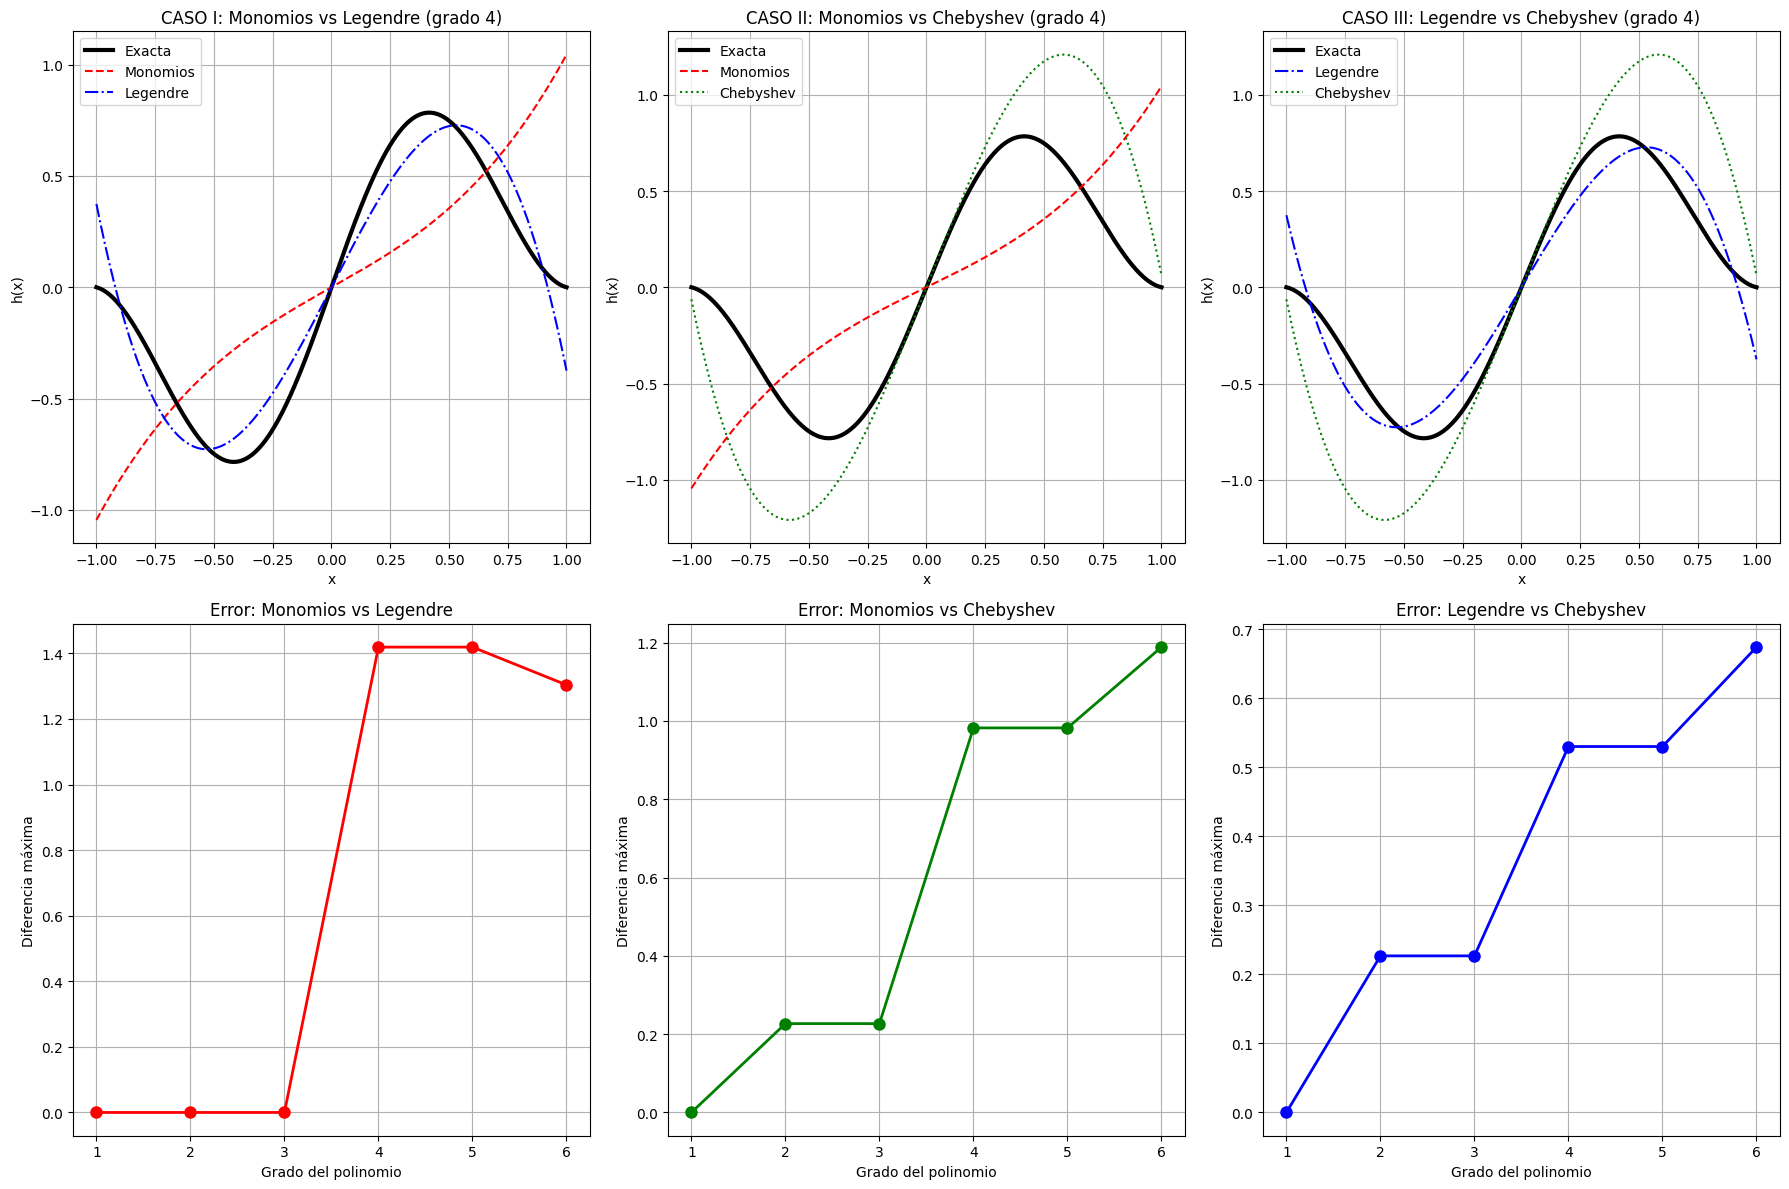


ESTIMACIÓN DE ERRORES POR GRADO

DIFERENCIAS MÁXIMAS ENTRE EXPANSIONES:
Grado  Mono-Leg   Mono-Cheb   Leg-Cheb
-----  ---------  ----------  ---------
  1    0.000000   0.000000   0.000000
  2    0.000000   0.226892   0.226892
  3    0.000000   0.226892   0.226892
  4    1.419149   0.982204   0.530255
  5    1.419149   0.982204   0.530255
  6    1.303769   1.188597   0.674340

CONCLUSIONES FINALES
1. CASO I (Monomios-Legendre):
   - Difieren significativamente a partir del grado 4
   - Legendre converge más rápido que monomios

2. CASO II (Monomios-Chebyshev):
   - Difieren significativamente a partir del grado 2
   - Chebyshev tiene mejor convergencia que monomios

3. CASO III (Legendre-Chebyshev):
   - Difieren significativamente a partir del grado 2
   - Ambas son bases ortogonales pero difieren en la aproximación

4. Los errores generalmente disminuyen al aumentar el grado
5. Las bases ortogonales superan a los monomios en convergencia
6. Gráfico guardado como 'analisis_completo.p

In [ ]:
# =============================================================================
# PARTE (d): EXPANSIONES DE h(x) = sin(3x)(1 - x²)
# =============================================================================
print("\n" + "="*60)
print("PARTE (d): EXPANSIONES DE h(x) = sin(3x)(1 - x²)")
print("="*60)

# Definir la función h(x)
def h(x):
    return np.sin(3*x) * (1 - x**2)

# Función para calcular coeficientes de forma SIMPLE
def calcular_coeficientes_simple(func, tipo_base, n_terminos=6):
    coeficientes = []

    for i in range(n_terminos):
        if tipo_base == 'monomio':
            # Para monomios: ∫h(x)*xⁱ dx / ∫(xⁱ)² dx
            numerador, _ = quad(lambda x: func(x) * x**i, a1, a2)
            denominador, _ = quad(lambda x: (x**i)**2, a1, a2)

        elif tipo_base == 'legendre':
            # Para Legendre: ∫h(x)*Pᵢ(x) dx / ∫Pᵢ(x)² dx
            poly = legendre(i)
            numerador, _ = quad(lambda x: func(x) * poly(x), a1, a2)
            denominador, _ = quad(lambda x: poly(x)**2, a1, a2)

        elif tipo_base == 'chebyshev':
            # Para Chebyshev: ∫h(x)*Tᵢ(x)*√(1-x²) dx / ∫Tᵢ(x)²*√(1-x²) dx
            poly = chebyt(i)
            numerador, _ = quad(lambda x: func(x) * poly(x) * np.sqrt(1-x**2), a1, a2)
            denominador, _ = quad(lambda x: poly(x)**2 * np.sqrt(1-x**2), a1, a2)

        coeficientes.append(numerador / denominador)

    return coeficientes

print("Calculando coeficientes...")

# Calcular coeficientes para todas las bases
coef_monomios = calcular_coeficientes_simple(h, 'monomio', 6)
coef_legendre = calcular_coeficientes_simple(h, 'legendre', 6)
coef_chebyshev = calcular_coeficientes_simple(h, 'chebyshev', 6)

print("✓ Coeficientes de monomios:", [f"{c:.4f}" for c in coef_monomios])
print("✓ Coeficientes de Legendre:", [f"{c:.4f}" for c in coef_legendre])
print("✓ Coeficientes de Chebyshev:", [f"{c:.4f}" for c in coef_chebyshev])

# Puntos para graficar
x_vals = np.linspace(-1, 1, 1000)
h_exacta = h(x_vals)

# Función para aproximar
def aproximar_simple(x_vals, coeficientes, tipo_base, n_terminos):
    resultado = np.zeros_like(x_vals)
    for i in range(n_terminos):
        if tipo_base == 'monomio':
            resultado += coeficientes[i] * (x_vals**i)
        elif tipo_base == 'legendre':
            poly = legendre(i)
            resultado += coeficientes[i] * poly(x_vals)
        elif tipo_base == 'chebyshev':
            poly = chebyt(i)
            resultado += coeficientes[i] * poly(x_vals)
    return resultado

# =============================================================================
# CASO I: MONOMIOS vs LEGENDRE
# =============================================================================
print("\n" + "="*50)
print("CASO I: MONOMIOS vs LEGENDRE")
print("="*50)

errores_caso1 = []
print("Diferencia máxima entre expansiones:")
for n in range(1, 7):
    approx_mono = aproximar_simple(x_vals, coef_monomios, 'monomio', n)
    approx_leg = aproximar_simple(x_vals, coef_legendre, 'legendre', n)
    diff = np.max(np.abs(approx_mono - approx_leg))
    errores_caso1.append(diff)
    print(f"Grado {n}: {diff:.6f}")

# Encontrar donde difieren significativamente
umbral = 0.01
grado_diff1 = next((i for i, diff in enumerate(errores_caso1, 1) if diff > umbral), ">6")
print(f"Diferen significativamente (>{umbral}) a partir del grado: {grado_diff1}")

# =============================================================================
# CASO II: MONOMIOS vs CHEBYSHEV
# =============================================================================
print("\n" + "="*50)
print("CASO II: MONOMIOS vs CHEBYSHEV")
print("="*50)

errores_caso2 = []
print("Diferencia máxima entre expansiones:")
for n in range(1, 7):
    approx_mono = aproximar_simple(x_vals, coef_monomios, 'monomio', n)
    approx_cheb = aproximar_simple(x_vals, coef_chebyshev, 'chebyshev', n)
    diff = np.max(np.abs(approx_mono - approx_cheb))
    errores_caso2.append(diff)
    print(f"Grado {n}: {diff:.6f}")

grado_diff2 = next((i for i, diff in enumerate(errores_caso2, 1) if diff > umbral), ">6")
print(f"Diferen significativamente (>{umbral}) a partir del grado: {grado_diff2}")

# =============================================================================
# CASO III: LEGENDRE vs CHEBYSHEV
# =============================================================================
print("\n" + "="*50)
print("CASO III: LEGENDRE vs CHEBYSHEV")
print("="*50)

errores_caso3 = []
print("Diferencia máxima entre expansiones:")
for n in range(1, 7):
    approx_leg = aproximar_simple(x_vals, coef_legendre, 'legendre', n)
    approx_cheb = aproximar_simple(x_vals, coef_chebyshev, 'chebyshev', n)
    diff = np.max(np.abs(approx_leg - approx_cheb))
    errores_caso3.append(diff)
    print(f"Grado {n}: {diff:.6f}")

grado_diff3 = next((i for i, diff in enumerate(errores_caso3, 1) if diff > umbral), ">6")
print(f"Diferen significativamente (>{umbral}) a partir del grado: {grado_diff3}")

# =============================================================================
# GRÁFICOS COMPARATIVOS
# =============================================================================
print("\n" + "="*60)
print("GRÁFICOS COMPARATIVOS")
print("="*60)

# Crear figura
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Gráfico 1: Comparación visual (grado 4)
n_grado = 4
approx_mono = aproximar_simple(x_vals, coef_monomios, 'monomio', n_grado)
approx_leg = aproximar_simple(x_vals, coef_legendre, 'legendre', n_grado)
approx_cheb = aproximar_simple(x_vals, coef_chebyshev, 'chebyshev', n_grado)

axes[0,0].plot(x_vals, h_exacta, 'k-', linewidth=3, label='Exacta')
axes[0,0].plot(x_vals, approx_mono, 'r--', label='Monomios')
axes[0,0].plot(x_vals, approx_leg, 'b-.', label='Legendre')
axes[0,0].set_xlabel('x')
axes[0,0].set_ylabel('h(x)')
axes[0,0].set_title('CASO I: Monomios vs Legendre (grado 4)')
axes[0,0].legend()
axes[0,0].grid(True)

axes[0,1].plot(x_vals, h_exacta, 'k-', linewidth=3, label='Exacta')
axes[0,1].plot(x_vals, approx_mono, 'r--', label='Monomios')
axes[0,1].plot(x_vals, approx_cheb, 'g:', label='Chebyshev')
axes[0,1].set_xlabel('x')
axes[0,1].set_ylabel('h(x)')
axes[0,1].set_title('CASO II: Monomios vs Chebyshev (grado 4)')
axes[0,1].legend()
axes[0,1].grid(True)

axes[0,2].plot(x_vals, h_exacta, 'k-', linewidth=3, label='Exacta')
axes[0,2].plot(x_vals, approx_leg, 'b-.', label='Legendre')
axes[0,2].plot(x_vals, approx_cheb, 'g:', label='Chebyshev')
axes[0,2].set_xlabel('x')
axes[0,2].set_ylabel('h(x)')
axes[0,2].set_title('CASO III: Legendre vs Chebyshev (grado 4)')
axes[0,2].legend()
axes[0,2].grid(True)

# Gráfico 2: Errores vs grado
grados = range(1, 7)

axes[1,0].plot(grados, errores_caso1, 'ro-', linewidth=2, marker='o', markersize=8)
axes[1,0].set_xlabel('Grado del polinomio')
axes[1,0].set_ylabel('Diferencia máxima')
axes[1,0].set_title('Error: Monomios vs Legendre')
axes[1,0].grid(True)
axes[1,0].set_xticks(grados)

axes[1,1].plot(grados, errores_caso2, 'go-', linewidth=2, marker='o', markersize=8)
axes[1,1].set_xlabel('Grado del polinomio')
axes[1,1].set_ylabel('Diferencia máxima')
axes[1,1].set_title('Error: Monomios vs Chebyshev')
axes[1,1].grid(True)
axes[1,1].set_xticks(grados)

axes[1,2].plot(grados, errores_caso3, 'bo-', linewidth=2, marker='o', markersize=8)
axes[1,2].set_xlabel('Grado del polinomio')
axes[1,2].set_ylabel('Diferencia máxima')
axes[1,2].set_title('Error: Legendre vs Chebyshev')
axes[1,2].grid(True)
axes[1,2].set_xticks(grados)

plt.tight_layout()
plt.savefig('analisis_completo.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# ESTIMACIÓN DE ERRORES
# =============================================================================
print("\n" + "="*60)
print("ESTIMACIÓN DE ERRORES POR GRADO")
print("="*60)

print("\nDIFERENCIAS MÁXIMAS ENTRE EXPANSIONES:")
print("Grado  Mono-Leg   Mono-Cheb   Leg-Cheb")
print("-----  ---------  ----------  ---------")

for grado in grados:
    print(f"  {grado}    {errores_caso1[grado-1]:8.6f}   {errores_caso2[grado-1]:8.6f}   {errores_caso3[grado-1]:8.6f}")

# =============================================================================
# CONCLUSIONES
# =============================================================================
print("\n" + "="*60)
print("CONCLUSIONES FINALES")
print("="*60)
print("1. CASO I (Monomios-Legendre):")
print(f"   - Difieren significativamente a partir del grado {grado_diff1}")
print("   - Legendre converge más rápido que monomios")

print(f"\n2. CASO II (Monomios-Chebyshev):")
print(f"   - Difieren significativamente a partir del grado {grado_diff2}")
print("   - Chebyshev tiene mejor convergencia que monomios")

print(f"\n3. CASO III (Legendre-Chebyshev):")
print(f"   - Difieren significativamente a partir del grado {grado_diff3}")
print("   - Ambas son bases ortogonales pero difieren en la aproximación")

print("\n4. Los errores generalmente disminuyen al aumentar el grado")
print("5. Las bases ortogonales superan a los monomios en convergencia")
print("6. Gráfico guardado como 'analisis_completo.png'")
